In [1]:
import acquire
import pandas as pd
from bs4 import BeautifulSoup
from requests import get
import re
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
new_or_used = 'all'
year = '2019,2018'
make = 'Ford'
model = 'F-150'
domain_list = ['mccombsfordwest.com', 'jordanford.net', 'southwayford.com', 'ancirakiasa.com', 'nsford.com',
               'ancirachev.com', 'freedomchevy.com', 'mynschevy.com', 'anciracjd.com', 'northstardodge.net', 
               'sanantoniododgechryslerjeepram.com', 'ingramparkcj.net', 'lonestarchryslerdodgejeepsanantonio.com', 
               'northparktoyota.com', 'cavendertoyota.com', 'redmccombstoyota.com', 'universaltoyota.com']

In [3]:
dataframes_of_dealership_data = {}
for domain in domain_list:
    dataframes_of_dealership_data[f'{domain}'] = acquire.get_dealership_data(domain, new_or_used, year, make, model)
    print(f'Completed {domain}')
    
dataframes_of_dealership_data

https://www.mccombsfordwest.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100
https://www.mccombsfordwest.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100&pt=2
162
4
162
162
162
162
162
162
162
162
162
17
Completed mccombsfordwest.com
https://www.jordanford.net/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100
https://www.jordanford.net/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100&pt=2
199
4
199
199
199
199
199
199
199
199
199
11
Completed jordanford.net
https://www.southwayford.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100
https://www.southwayford.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100&pt=2
https://www.southwayford.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100&pt=3
205
4
205
205
205
205
205
205
205
205
205
13
Completed southwayford.com
https://www.ancirakiasa.com/searchall.aspx?Year=2019,2018&Make=Ford&Model=F-150&pn=100
Completed ancirakiasa.com
https://www.nsford.com/searchall

{'mccombsfordwest.com':      year  make             model condition    price           body_style  \
 0    2019  Ford  F-150 King Ranch       new  $56,067      Crew Cab Pickup   
 1    2019  Ford      F-150 Lariat       new  $46,804  Extended Cab Pickup   
 2    2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 3    2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 4    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 5    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 6    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 7    2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 8    2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 9    2019  Ford         F-150 STX       new  $48,252      Crew Cab Pickup   
 10   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 11   2019  Ford         F-150 STX       

In [4]:
dataframes_of_dealership_data

{'mccombsfordwest.com':      year  make             model condition    price           body_style  \
 0    2019  Ford  F-150 King Ranch       new  $56,067      Crew Cab Pickup   
 1    2019  Ford      F-150 Lariat       new  $46,804  Extended Cab Pickup   
 2    2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 3    2019  Ford          F-150 XL       new  $28,502      Crew Cab Pickup   
 4    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 5    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 6    2019  Ford         F-150 STX       new  $28,502      Crew Cab Pickup   
 7    2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 8    2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 9    2019  Ford         F-150 STX       new  $48,252      Crew Cab Pickup   
 10   2019  Ford         F-150 STX       new  $32,482      Crew Cab Pickup   
 11   2019  Ford         F-150 STX       

In [5]:
df = pd.concat(dataframes_of_dealership_data.values(), ignore_index=True)

In [6]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,"$56,067",Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,"$46,804",Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,"$28,502",Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [7]:
df.dtypes

year            object
make            object
model           object
condition       object
price           object
body_style      object
mileage         object
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [8]:
df.year = df.year.astype('int')

In [9]:
df.price = df.price.str.replace('$', '').str.replace(',', '')

In [10]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [11]:
df.mileage = df.mileage.astype('str').str.replace(',', '').astype('int')

In [12]:
df.head()

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
0,2019,Ford,F-150 King Ranch,new,56067,Crew Cab Pickup,0,5.0L Ti-VCT V8 Engine with Auto Start/Stop Tec...,Automatic,RWD,Oxford White,McCombs Ford West
1,2019,Ford,F-150 Lariat,new,46804,Extended Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,4WD,Magnetic Metallic,McCombs Ford West
2,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
3,2019,Ford,F-150 XL,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West
4,2019,Ford,F-150 STX,new,28502,Crew Cab Pickup,0,2.7L EcoBoost® V6 Engine with Auto Start/Stop ...,Automatic,RWD,Oxford White,McCombs Ford West


In [13]:
def is_number(s):
    try:
        float(s)
        return True
    except ValueError:
        return False

In [14]:
df = df[df.price.apply(is_number)]

In [15]:
df.price = df.price.astype('int')

In [16]:
df.dtypes

year             int32
make            object
model           object
condition       object
price            int32
body_style      object
mileage          int32
engine          object
transmission    object
drivetrain      object
ext_color       object
dealer          object
dtype: object

In [17]:
df.model.value_counts()

F-150 XLT                              263
F-150 XL                               101
F-150 LARIAT                            73
F-150 Raptor                            68
F-150 Lariat                            48
F-150 STX                               44
F-150 XL STX Appearance Package         40
F-150 King Ranch                        32
F-150 King Ranch®                       15
F-150 Platinum                          11
F-150 Limited                            6
F-150                                    6
F-150 Raptor Shelby Baja Raptor Pkg      1
F-150 XL STX                             1
F-150 Lariat Harley Davidson             1
F-150 ROUSH                              1
Name: model, dtype: int64

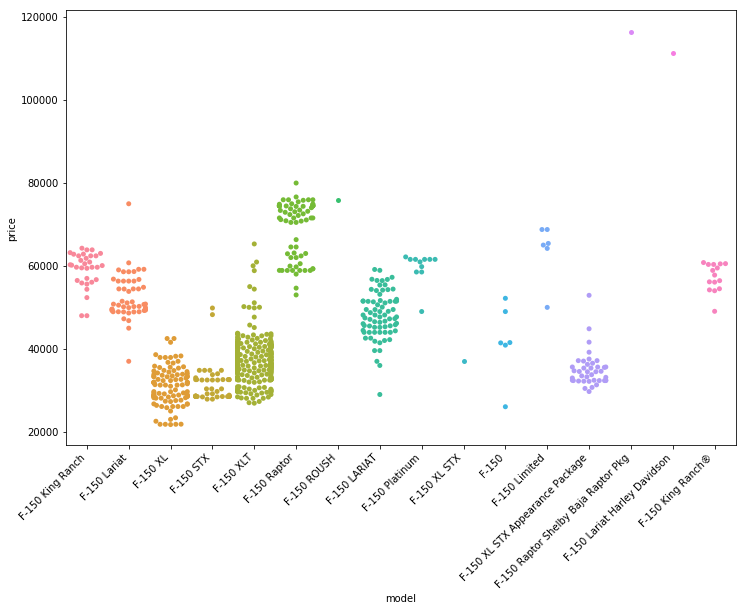

In [18]:
plt.figure(figsize=(12, 8))
sns.swarmplot(df.model, df.price)
plt.xticks(rotation=45, ha='right')
plt.show()

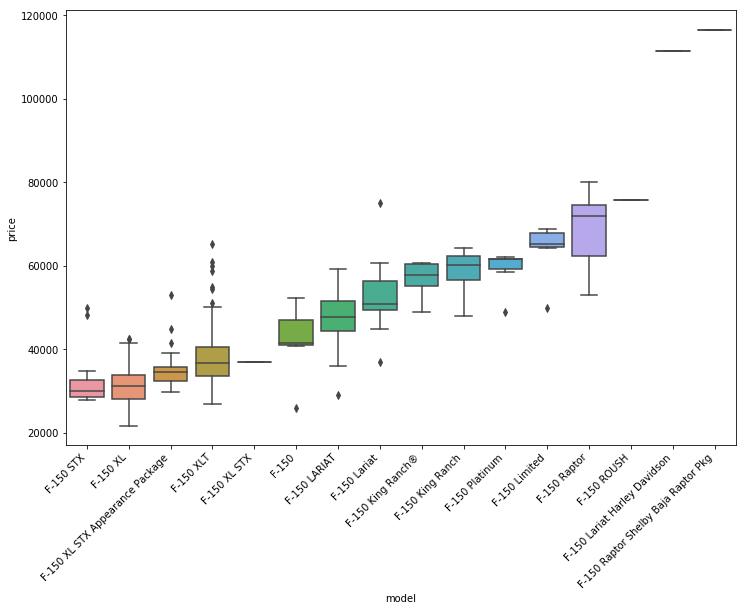

In [19]:
plt.figure(figsize=(12,8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index)
plt.xticks(rotation=45, ha='right')
plt.show()

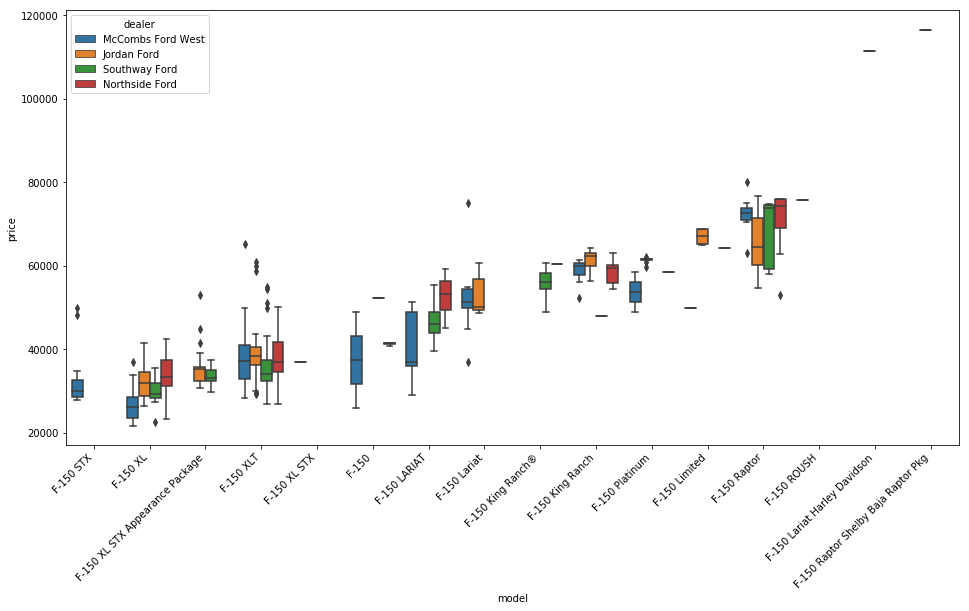

In [20]:
plt.figure(figsize=(16, 8))

grouped = df.groupby('model')
df2 = pd.DataFrame({col:vals['price'] for col,vals in grouped})

meds = df2.median()
meds = meds.sort_values(ascending=True)

sns.boxplot(df.model, df.price, order=meds.index, hue=df.dealer)
plt.xticks(rotation=45, ha='right')
plt.show()

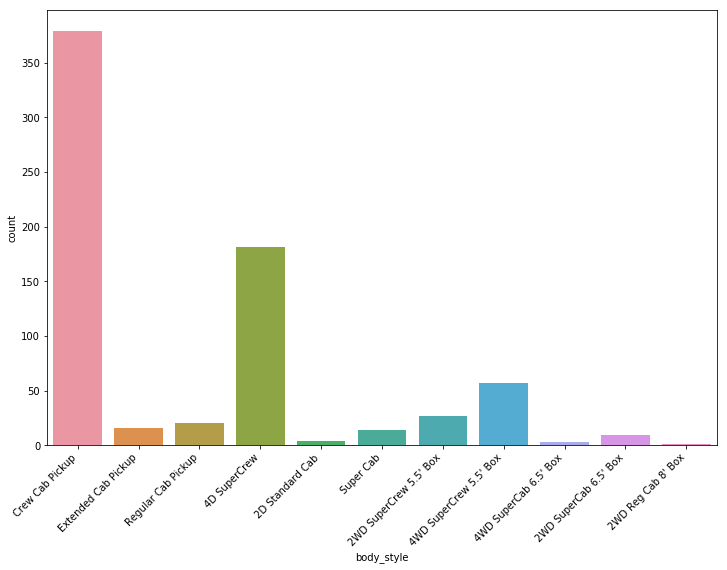

In [21]:
plt.figure(figsize=(12, 8))
sns.countplot(df.body_style)
plt.xticks(rotation=45, ha='right')
plt.show()

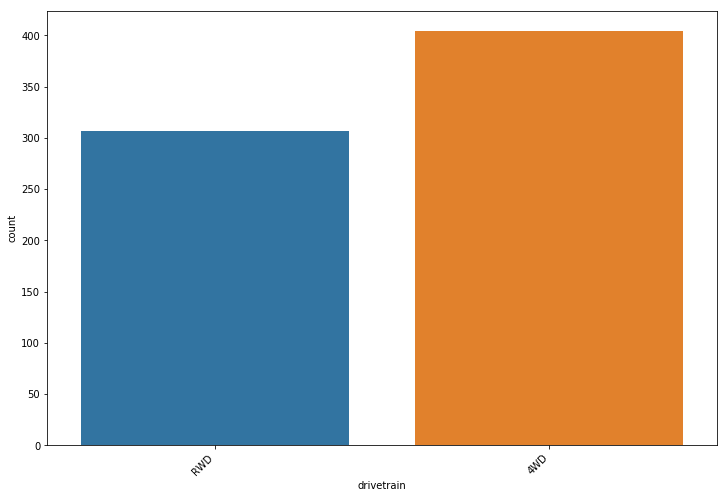

In [22]:
plt.figure(figsize=(12, 8))
sns.countplot(df.drivetrain)
plt.xticks(rotation=45, ha='right')
plt.show()

In [23]:
df[df.price == df.price.min()].to_dict('r')

[{'year': 2019,
  'make': 'Ford',
  'model': 'F-150 XL',
  'condition': 'new',
  'price': 21734,
  'body_style': 'Regular Cab Pickup',
  'mileage': 0,
  'engine': '3.3L Ti-VCT V6 Engine with Auto Start/Stop Technology',
  'transmission': 'Automatic',
  'drivetrain': 'RWD',
  'ext_color': 'Oxford White',
  'dealer': 'McCombs Ford West'}]

In [54]:
df3 = df.groupby(['model', 'condition', 'dealer']).price.describe().reset_index().sort_values(by=['model', 'condition', '50%'])
df3[df3.model == 'F-150 XLT'][['dealer', 'condition', 'count', 'mean', '50%', 'min', 'max']].sort_values(by='dealer')

,dealer,condition,count,mean,50%,min,max
46,Jordan Ford,new,76.0,38794.513158,38615.0,29650.0,60935.0
50,Jordan Ford,used,2.0,33664.500000,33664.5,29342.0,37987.0
47,McCombs Ford West,new,44.0,38024.272727,37202.0,28422.0,65300.0
51,McCombs Ford West,used,4.0,33492.250000,33990.0,28990.0,36999.0
48,Northside Ford,new,60.0,37913.666667,37447.5,26895.0,50185.0
52,Northside Ford,used,2.0,32623.500000,32623.5,31999.0,33248.0
49,Southway Ford,new,70.0,35477.142857,34350.5,27015.0,55005.0
53,Southway Ford,used,5.0,31764.400000,29998.0,29834.0,35998.0


In [39]:
new_used_grouped = pd.DataFrame(df.groupby(['condition', 'model'])[['price', 'mileage']].median()).reset_index()
new_used_grouped[new_used_grouped.model == 'F-150 XLT']

,condition,model,price,mileage
14,new,F-150 XLT,37167.5,0.0
25,used,F-150 XLT,32992.0,19699.0


In [55]:
df[(df.mileage < 10000) & (df.condition == 'used') & (df.year == 2018)]

,year,make,model,condition,price,body_style,mileage,engine,transmission,drivetrain,ext_color,dealer
155,2018,Ford,F-150 STX,used,33992,Crew Cab Pickup,9979,2.7L V6 24V PDI DOHC Twin Turbo,Automatic,RWD,Gray,McCombs Ford West
357,2018,Ford,F-150 XLT,used,29342,Super Cab,4365,3.3L V6 24V PDI DOHC Flexible Fuel,6-Speed Automatic Electronic,RWD,Oxford White,Jordan Ford
562,2018,Ford,F-150 XLT,used,35998,2WD SuperCrew 5.5' Box,8890,2.7L V6 Cylinder Engine,10-Speed A/T,RWD,Lightning Blue,Southway Ford


In [42]:
df.body_style.unique()

array(['Crew Cab Pickup', 'Extended Cab Pickup', 'Regular Cab Pickup',
       '4D SuperCrew', '2D Standard Cab', 'Super Cab',
       "2WD SuperCrew 5.5' Box", "4WD SuperCrew 5.5' Box",
       "4WD SuperCab 6.5' Box", "2WD SuperCab 6.5' Box",
       "2WD Reg Cab 8' Box"], dtype=object)